In [120]:
import os

In [121]:
os.getcwd()

'C:\\Users\\Harsh\\Downloads\\Techm DSA\\Week2 Assessment _ Harsh\\Week 2 Assessment Stats & Linear Regression'

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   

C:\Users\Harsh\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Harsh\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Harsh\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Harsh\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\Har

In [145]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

### Part1 Hypothesis Testing

In [ ]:
# Load the data
Hypotest=pd.read_csv("D:\\Data_Science\\Week2-Assessment\\Testing_Of_Hypothesis.csv",sep=',')

In [ ]:
Hypotest.head()

In [ ]:
Hypotest.shape

In [ ]:
Samsung_sc = Hypotest['Samsung Score']
Apple_sc = Hypotest['Apple_Score']
print(Samsung_sc.head())
print(Apple_sc.head())

In [ ]:
print (Samsung_sc.mean())
print (Apple_sc.mean())

In [ ]:
print (Samsung_sc.std())
print (Apple_sc.std())

In [ ]:
import scipy.stats as stats


In [ ]:
stats.ttest_ind(a= Samsung_sc,
                b= Apple_sc,
                equal_var=False) 

In [ ]:
# if we take the .05 pct as a parameter we can say that overall customer satisfaction score is same.

### One Sample T-Test


In [ ]:
stats.ttest_1samp(a= Samsung_sc,               # Sample data
                 popmean= 75)  # Pop mean

In [ ]:
#We can reject the null hypothesis this means that the assumption of minimum average customer satisfaction score of Samsung is not 75%.

#### Part 2 Predictive Modelling


In [124]:
# Load the data
#creditdata=pd.read_csv("D:\\Data_Science\\Week2-Assessment\\Credit Card data.csv",sep=',')
creditdata=pd.read_csv("C:\\Users\\Harsh\\Downloads\\Techm DSA\\Week2 Assessment _ Harsh\\Credit Card data.csv",sep=',')
#C:\Users\Harsh\Downloads\Techm DSA\Week2 Assessment _ Harsh

In [125]:
creditdata.head().T

,0,1,2,3,4
Account Balance,1,1,2,1,1
Duration of Credit (month),18,9,12,12,12
Payment Status of Previous Credit,4,4,2,4,4
Purpose,2,0,9,0,0
Credit Amount,1049,2799,841,2122,2171
Value Savings/Stocks,1,1,2,1,1
Length of current employment,2,3,4,3,3
Instalment per cent,4,2,2,3,4
Sex & Marital Status,2,3,2,3,3
Guarantors,1,1,1,1,1


In [126]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    1000 non-null int64
No of Credits at this Bank           10

In [127]:
    creditdata.columns= [col.strip().replace(' ', '_') for col in creditdata.columns]

In [128]:
    creditdata.columns= [col.strip().replace(')', '_') for col in creditdata.columns]

In [129]:
    creditdata.columns= [col.strip().replace('(', '_') for col in creditdata.columns]

In [130]:
    creditdata.columns= [col.strip().replace('&', '') for col in creditdata.columns]

In [131]:
    creditdata.columns= [col.strip().replace('__', '_') for col in creditdata.columns]

In [132]:
creditdata.columns= [col.strip().replace('/', '') for col in creditdata.columns]
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Account_Balance                      1000 non-null int64
Duration_of_Credit_month_            1000 non-null int64
Payment_Status_of_Previous_Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit_Amount                        1000 non-null int64
Value_SavingsStocks                  1000 non-null int64
Length_of_current_employment         1000 non-null int64
Instalment_per_cent                  1000 non-null int64
Sex_Marital_Status                   1000 non-null int64
Guarantors                           1000 non-null int64
Duration_in_Current_address          1000 non-null int64
Most_valuable_available_asset        1000 non-null int64
Age_years_                           1000 non-null int64
Concurrent_Credits                   1000 non-null int64
Type_of_apartment                    1000 non-null int64
No_of_Credits_at_this_Bank           10

In [133]:
creditdata.head().T

,0,1,2,3,4
Account_Balance,1,1,2,1,1
Duration_of_Credit_month_,18,9,12,12,12
Payment_Status_of_Previous_Credit,4,4,2,4,4
Purpose,2,0,9,0,0
Credit_Amount,1049,2799,841,2122,2171
Value_SavingsStocks,1,1,2,1,1
Length_of_current_employment,2,3,4,3,3
Instalment_per_cent,4,2,2,3,4
Sex_Marital_Status,2,3,2,3,3
Guarantors,1,1,1,1,1


In [134]:
credit_num = creditdata[['Duration_of_Credit_month_','Credit_Amount','Instalment_per_cent','Duration_in_Current_address','Age_years_','No_of_Credits_at_this_Bank','No_of_dependents','Bad_Flag']]

In [135]:
credit_cat = creditdata.columns.difference(['Duration_of_Credit_month_','Credit_Amount','Instalment_per_cent','Duration_in_Current_address','Age_years_','No_of_Credits_at_this_Bank','No_of_dependents','Bad_Flag'])

In [136]:
#print(credit_num.columns)
credit_catg = creditdata[credit_cat]

In [137]:
credit_num.columns

Index(['Duration_of_Credit_month_', 'Credit_Amount', 'Instalment_per_cent',
       'Duration_in_Current_address', 'Age_years_',
       'No_of_Credits_at_this_Bank', 'No_of_dependents', 'Bad_Flag'],
      dtype='object')

In [139]:
cat_cols = credit_catg.columns

In [140]:
cat_cols

Index(['Account_Balance', 'Concurrent_Credits', 'Foreign_Worker', 'Guarantors',
       'Length_of_current_employment', 'Most_valuable_available_asset',
       'Occupation', 'Payment_Status_of_Previous_Credit', 'Purpose',
       'Sex_Marital_Status', 'Telephone', 'Type_of_apartment',
       'Value_SavingsStocks'],
      dtype='object')

In [141]:
for c_feature in credit_catg.columns:
    credit_catg[c_feature] = credit_catg[c_feature].astype('category')


C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [142]:
credit_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
Account_Balance                      1000 non-null category
Concurrent_Credits                   1000 non-null category
Foreign_Worker                       1000 non-null category
Guarantors                           1000 non-null category
Length_of_current_employment         1000 non-null category
Most_valuable_available_asset        1000 non-null category
Occupation                           1000 non-null category
Payment_Status_of_Previous_Credit    1000 non-null category
Purpose                              1000 non-null category
Sex_Marital_Status                   1000 non-null category
Telephone                            1000 non-null category
Type_of_apartment                    1000 non-null category
Value_SavingsStocks                  1000 non-null category
dtypes: category(13)
memory usage: 15.0 KB


In [146]:
pandas_profiling.ProfileReport(creditdata)

Number of variables,21
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,164.1 KiB
Average record size in memory,168.1 B
Numeric,17
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [147]:
credit_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
Account_Balance                      1000 non-null category
Concurrent_Credits                   1000 non-null category
Foreign_Worker                       1000 non-null category
Guarantors                           1000 non-null category
Length_of_current_employment         1000 non-null category
Most_valuable_available_asset        1000 non-null category
Occupation                           1000 non-null category
Payment_Status_of_Previous_Credit    1000 non-null category
Purpose                              1000 non-null category
Sex_Marital_Status                   1000 non-null category
Telephone                            1000 non-null category
Type_of_apartment                    1000 non-null category
Value_SavingsStocks                  1000 non-null category
dtypes: category(13)
memory usage: 15.0 KB


In [148]:
credit_catg.dtypes

Account_Balance                      category
Concurrent_Credits                   category
Foreign_Worker                       category
Guarantors                           category
Length_of_current_employment         category
Most_valuable_available_asset        category
Occupation                           category
Payment_Status_of_Previous_Credit    category
Purpose                              category
Sex_Marital_Status                   category
Telephone                            category
Type_of_apartment                    category
Value_SavingsStocks                  category
dtype: object

In [149]:
numeric_var_names=[key for key in dict(credit_num.dtypes) if dict(credit_num.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit_catg.dtypes) if dict(credit_catg.dtypes)[key] in ['category']]
#print(numeric_var_names)
print(cat_var_names)

['Account_Balance', 'Concurrent_Credits', 'Foreign_Worker', 'Guarantors', 'Length_of_current_employment', 'Most_valuable_available_asset', 'Occupation', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Sex_Marital_Status', 'Telephone', 'Type_of_apartment', 'Value_SavingsStocks']


In [150]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_num.apply(lambda x: var_summary(x)).T

In [151]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Duration_of_Credit_month_,1000.0,0.0,20903.0,20.903,18.0,12.058814,1.454150e+02,4.0,6.00,6.00,9.0,12.0,18.0,24.00,36.0,48.0,60.00,72.0
Credit_Amount,1000.0,0.0,3271248.0,3271.248,2319.5,2822.751760,7.967927e+06,250.0,425.83,708.95,934.7,1365.5,2319.5,3972.25,7179.4,9162.7,14180.39,18424.0
Instalment_per_cent,1000.0,0.0,2973.0,2.973,3.0,1.118715,1.251523e+00,1.0,1.00,1.00,1.0,2.0,3.0,4.00,4.0,4.0,4.00,4.0
Duration_in_Current_address,1000.0,0.0,2845.0,2.845,3.0,1.103718,1.218193e+00,1.0,1.00,1.00,1.0,2.0,3.0,4.00,4.0,4.0,4.00,4.0
Age_years_,1000.0,0.0,35542.0,35.542,33.0,11.352670,1.288831e+02,19.0,20.00,22.00,23.0,27.0,33.0,42.00,52.0,60.0,67.01,75.0
No_of_Credits_at_this_Bank,1000.0,0.0,1407.0,1.407,1.0,0.577654,3.336847e-01,1.0,1.00,1.00,1.0,1.0,1.0,2.00,2.0,2.0,3.00,4.0
No_of_dependents,1000.0,0.0,1155.0,1.155,1.0,0.362086,1.311061e-01,1.0,1.00,1.00,1.0,1.0,1.0,1.00,2.0,2.0,2.00,2.0
Bad_Flag,1000.0,0.0,300.0,0.300,0.0,0.458487,2.102102e-01,0.0,0.00,0.00,0.0,0.0,0.0,1.00,1.0,1.0,1.00,1.0


In [152]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_num=credit_num.apply(lambda x: outlier_capping(x))

In [153]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

credit_num=credit_num.apply(lambda x: Missing_imputation(x))

In [154]:
pandas_profiling.ProfileReport(credit_num)

Number of variables,8
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,62.6 KiB
Average record size in memory,64.1 B
Numeric,6
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [155]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [156]:
cat_cols 

Index(['Account_Balance', 'Concurrent_Credits', 'Foreign_Worker', 'Guarantors',
       'Length_of_current_employment', 'Most_valuable_available_asset',
       'Occupation', 'Payment_Status_of_Previous_Credit', 'Purpose',
       'Sex_Marital_Status', 'Telephone', 'Type_of_apartment',
       'Value_SavingsStocks'],
      dtype='object')

In [157]:
#for c_feature in categorical_features
#House_Price_cat=HouseP[['Brick', 'Neighborhood']]

for c_feature in cat_cols:
    credit_catg[c_feature] = credit_catg[c_feature].astype('category')
    credit_catg = create_dummies(credit_catg , c_feature )

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [158]:
credit_catg.head()

,Account_Balance_2,Account_Balance_3,Account_Balance_4,Concurrent_Credits_2,Concurrent_Credits_3,Foreign_Worker_2,Guarantors_2,Guarantors_3,Length_of_current_employment_2,Length_of_current_employment_3,...,Sex_Marital_Status_2,Sex_Marital_Status_3,Sex_Marital_Status_4,Telephone_2,Type_of_apartment_2,Type_of_apartment_3,Value_SavingsStocks_2,Value_SavingsStocks_3,Value_SavingsStocks_4,Value_SavingsStocks_5
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [159]:
credit_new = pd.concat([credit_num, credit_catg], axis=1)

In [160]:
credit_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
Duration_of_Credit_month_              1000 non-null float64
Credit_Amount                          1000 non-null float64
Instalment_per_cent                    1000 non-null float64
Duration_in_Current_address            1000 non-null float64
Age_years_                             1000 non-null float64
No_of_Credits_at_this_Bank             1000 non-null float64
No_of_dependents                       1000 non-null float64
Bad_Flag                               1000 non-null float64
Account_Balance_2                      1000 non-null uint8
Account_Balance_3                      1000 non-null uint8
Account_Balance_4                      1000 non-null uint8
Concurrent_Credits_2                   1000 non-null uint8
Concurrent_Credits_3                   1000 non-null uint8
Foreign_Worker_2                       1000 non-null uint8
Guarantors_2                           1000 non-null

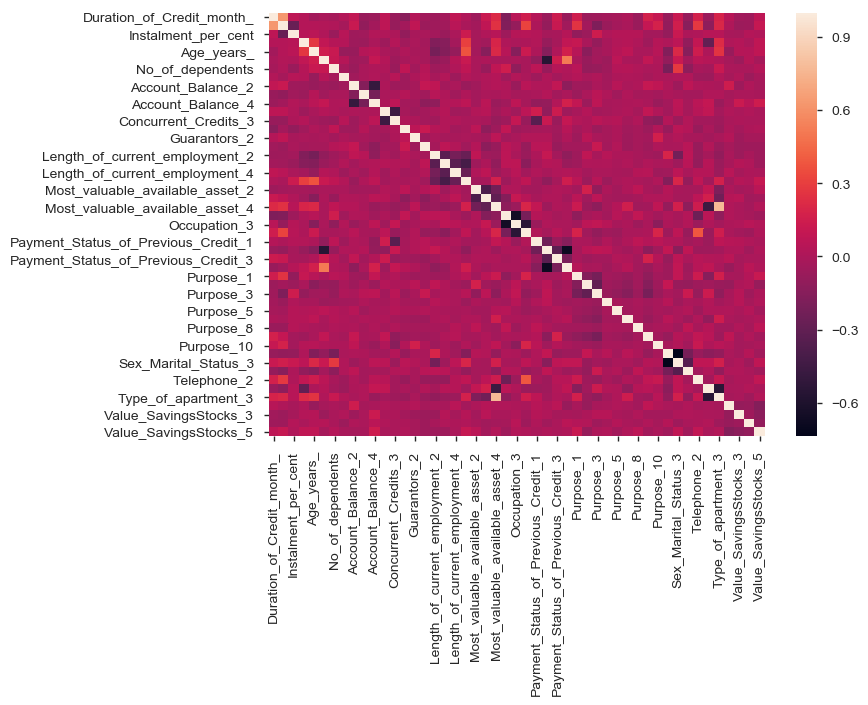

In [161]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(credit_new.corr())

In [162]:
credit_new.columns.difference(['Bad_Flag'])

Index(['Account_Balance_2', 'Account_Balance_3', 'Account_Balance_4',
       'Age_years_', 'Concurrent_Credits_2', 'Concurrent_Credits_3',
       'Credit_Amount', 'Duration_in_Current_address',
       'Duration_of_Credit_month_', 'Foreign_Worker_2', 'Guarantors_2',
       'Guarantors_3', 'Instalment_per_cent', 'Length_of_current_employment_2',
       'Length_of_current_employment_3', 'Length_of_current_employment_4',
       'Length_of_current_employment_5', 'Most_valuable_available_asset_2',
       'Most_valuable_available_asset_3', 'Most_valuable_available_asset_4',
       'No_of_Credits_at_this_Bank', 'No_of_dependents', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Payment_Status_of_Previous_Credit_1',
       'Payment_Status_of_Previous_Credit_2',
       'Payment_Status_of_Previous_Credit_3',
       'Payment_Status_of_Previous_Credit_4', 'Purpose_1', 'Purpose_10',
       'Purpose_2', 'Purpose_3', 'Purpose_4', 'Purpose_5', 'Purpose_6',
       'Purpose_8', 'Purpose_9', 'Sex_

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Harsh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


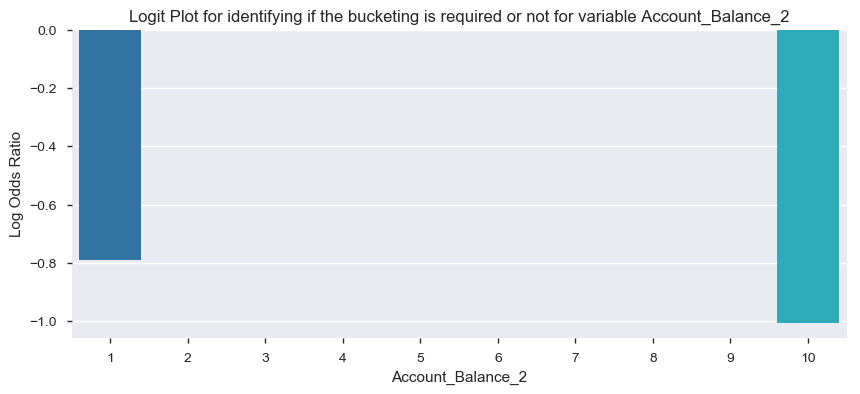

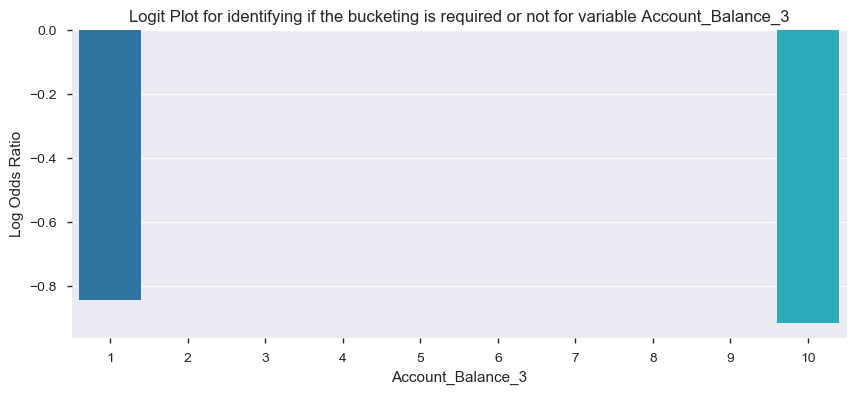

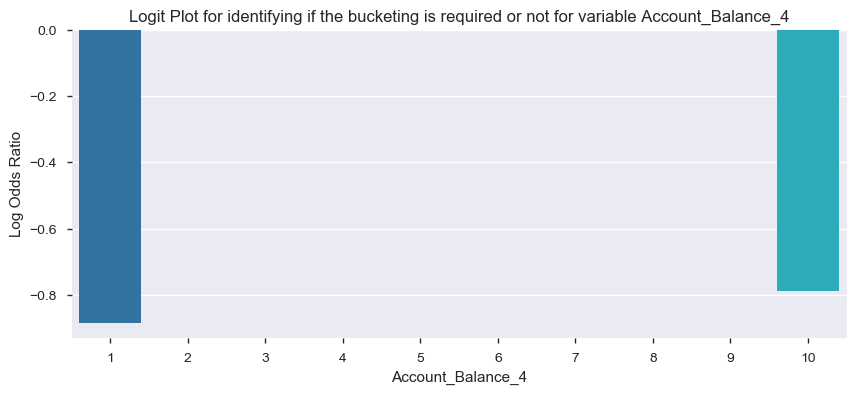

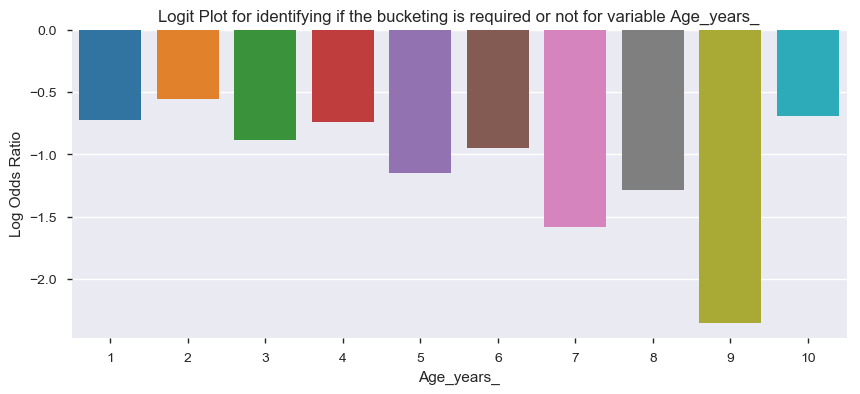

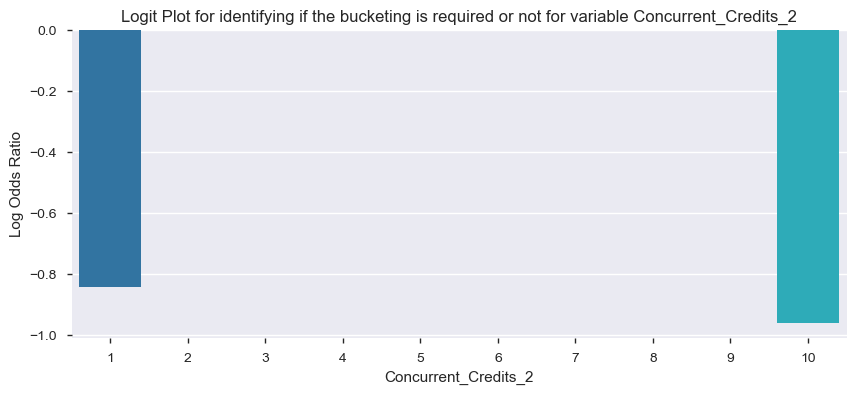

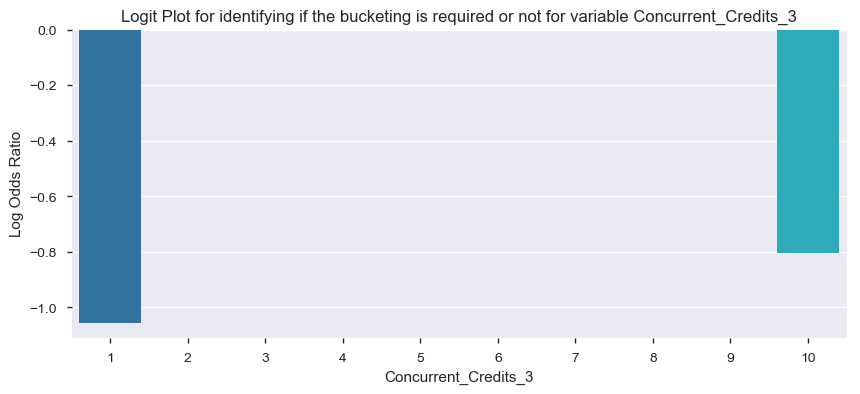

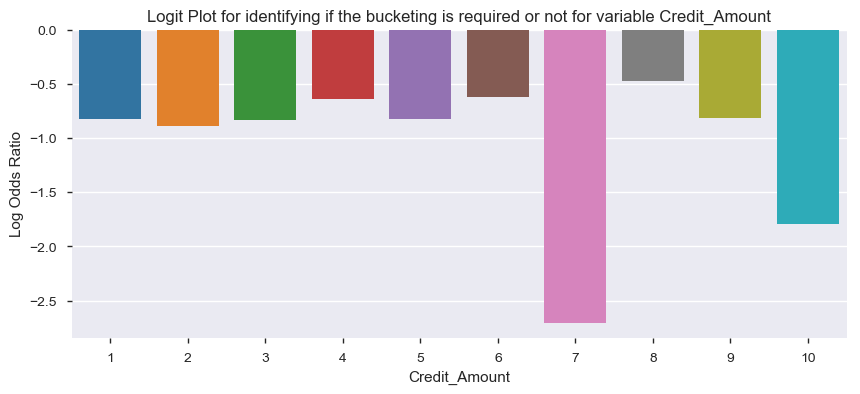

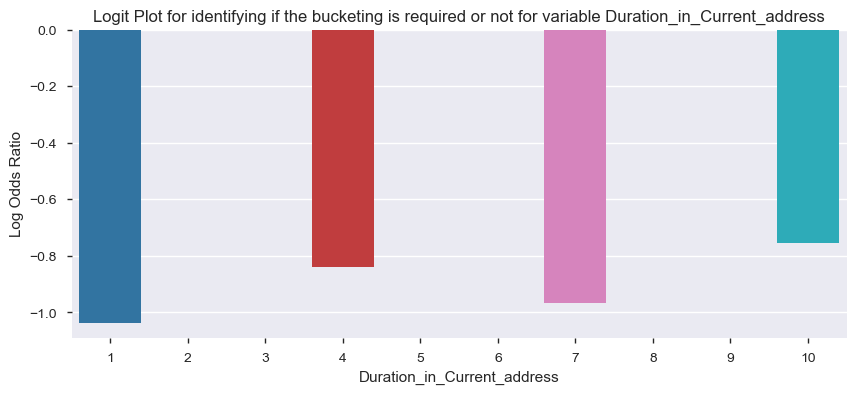

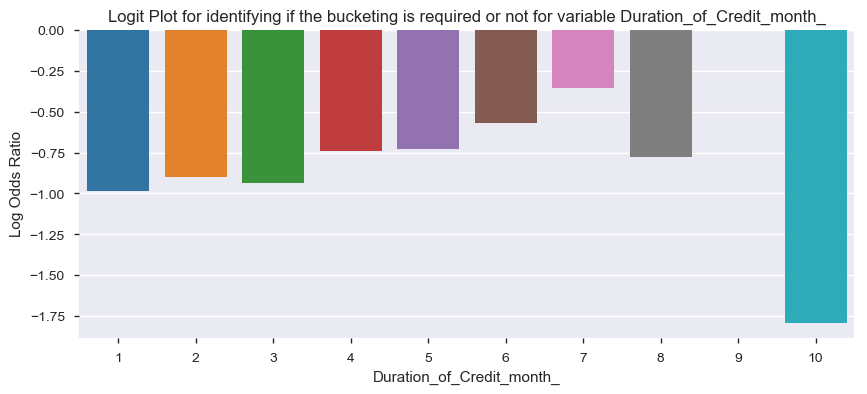

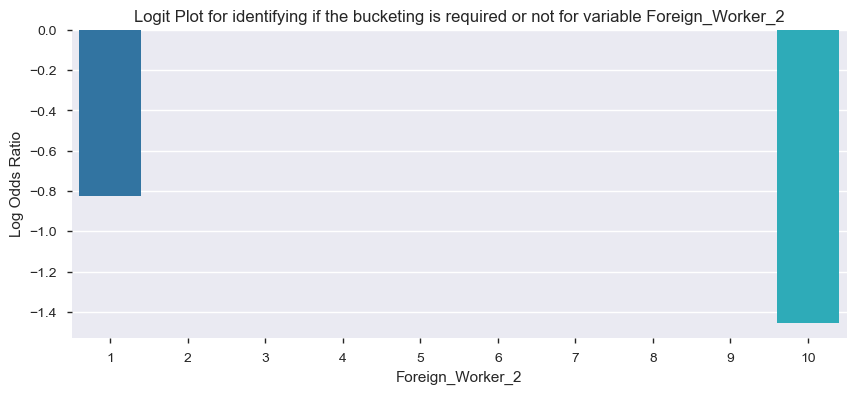

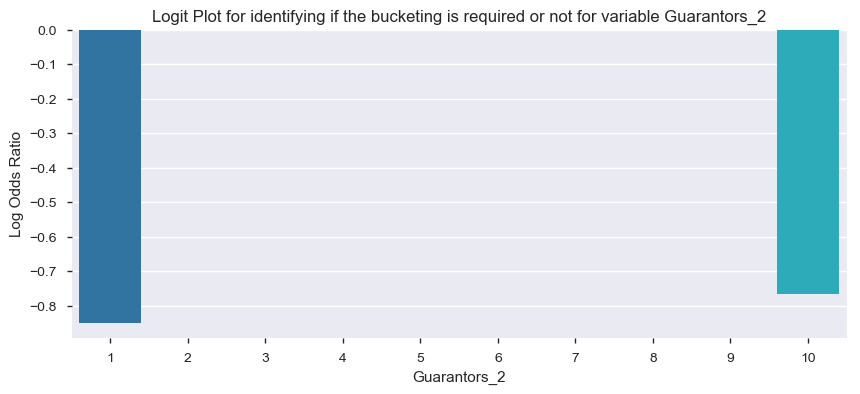

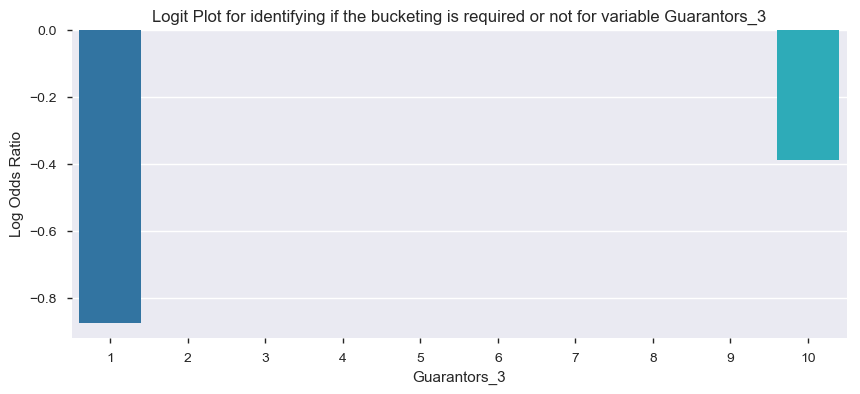

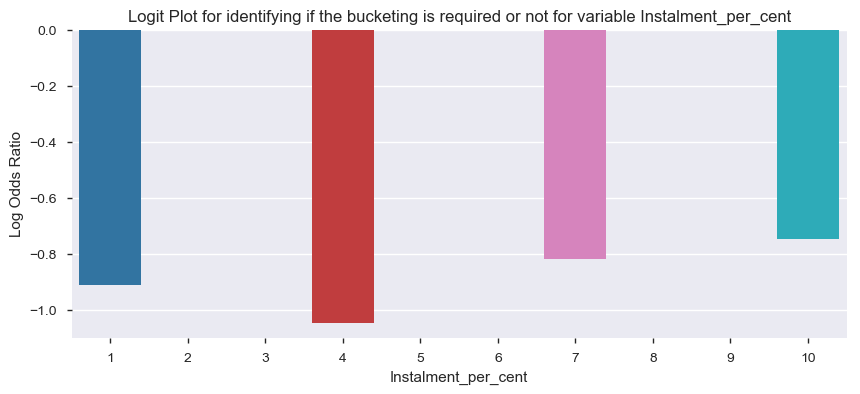

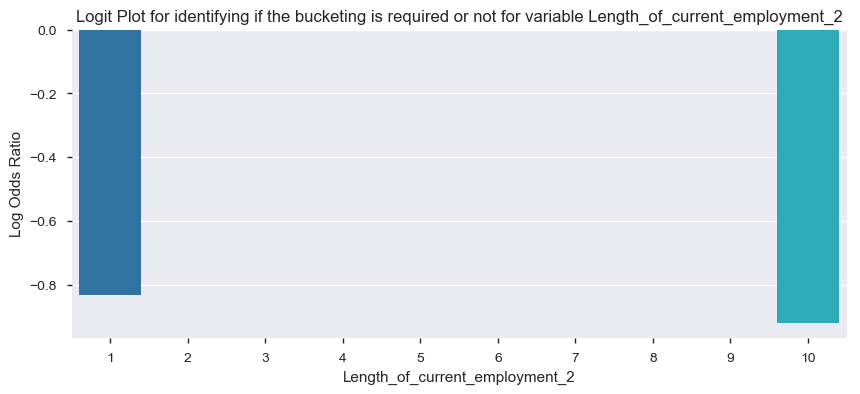

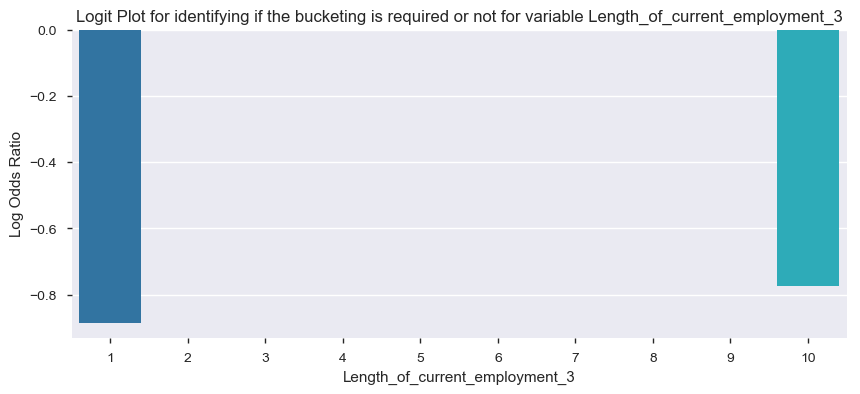

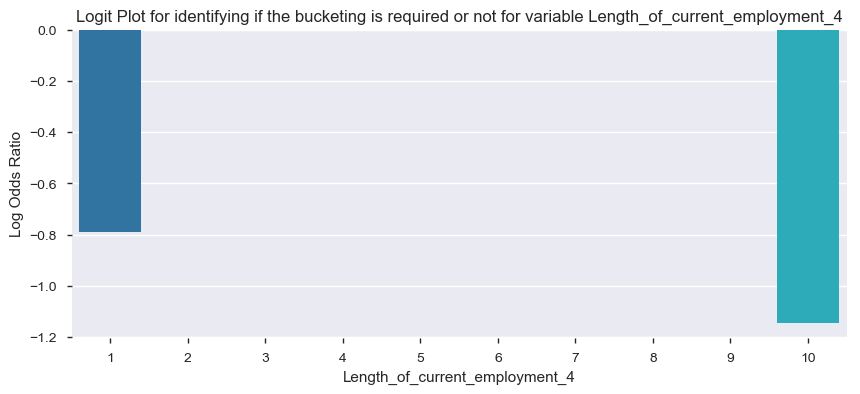

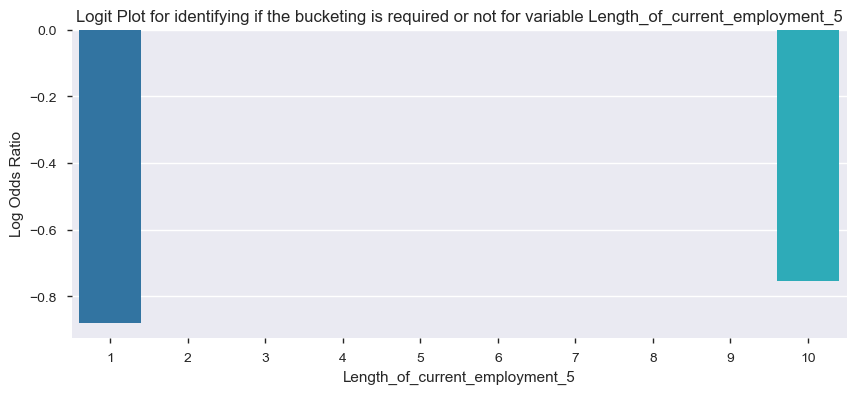

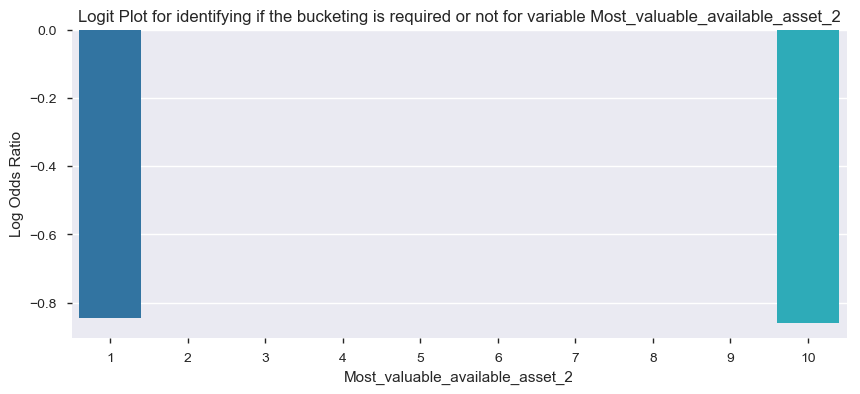

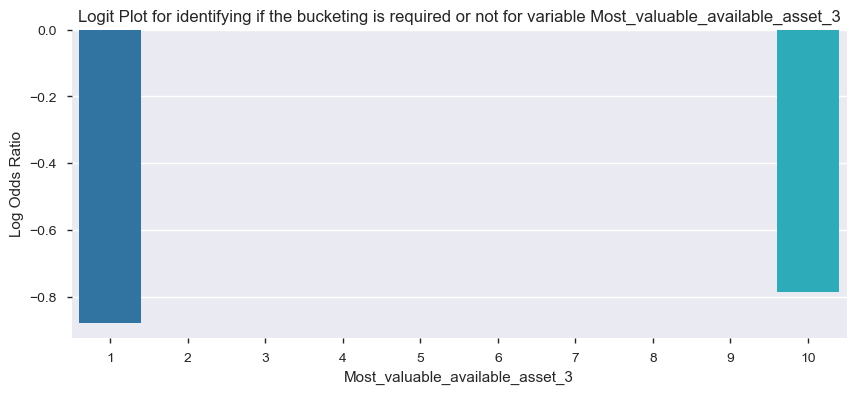

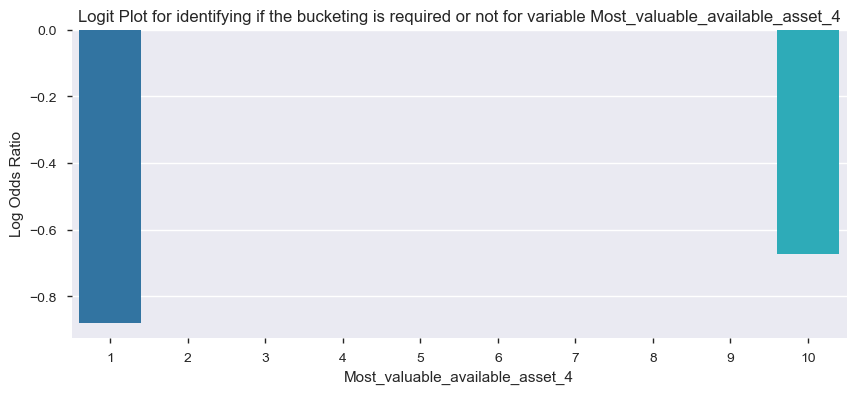

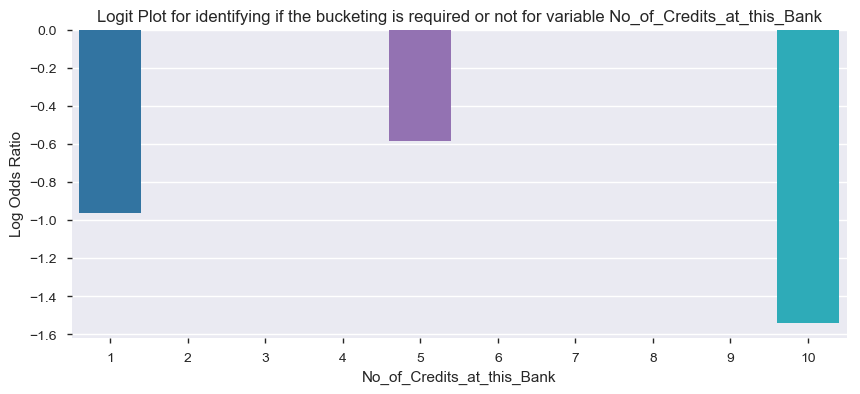

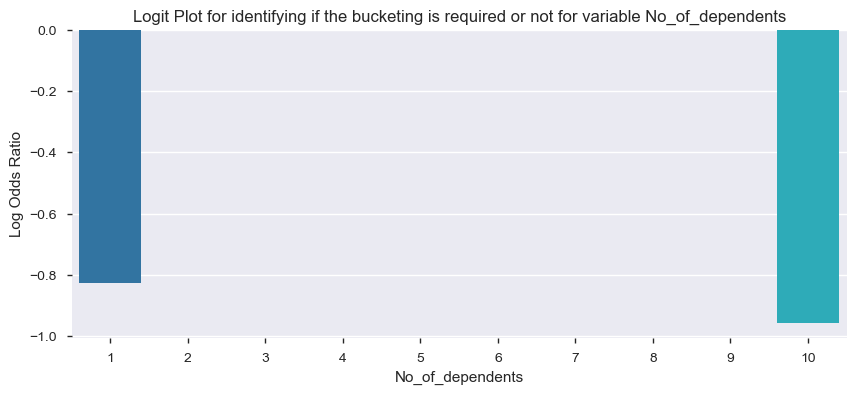

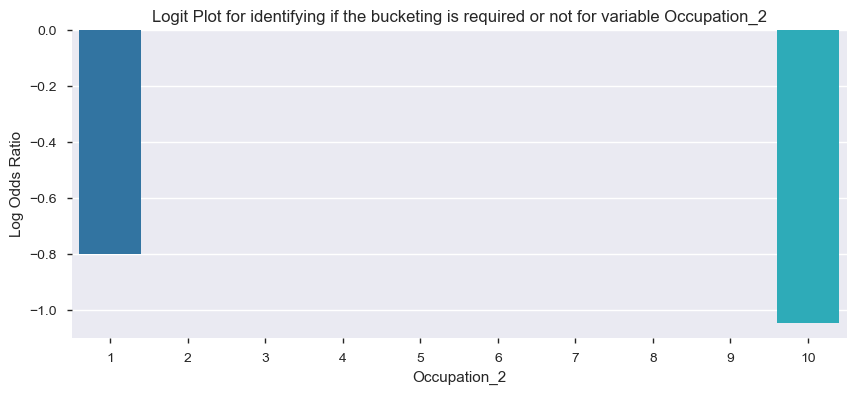

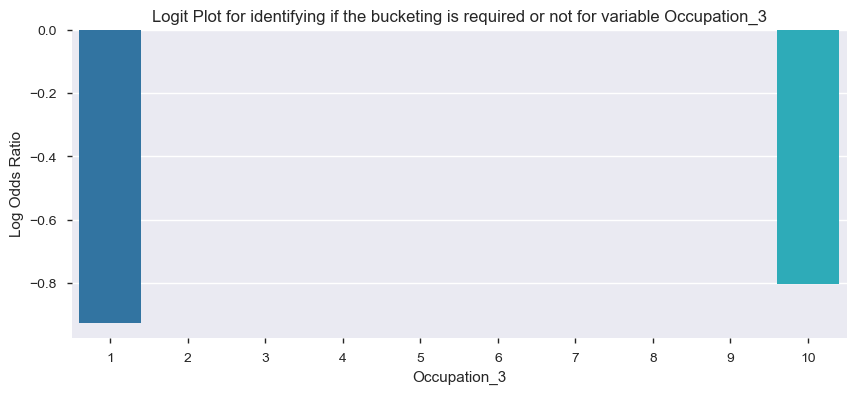

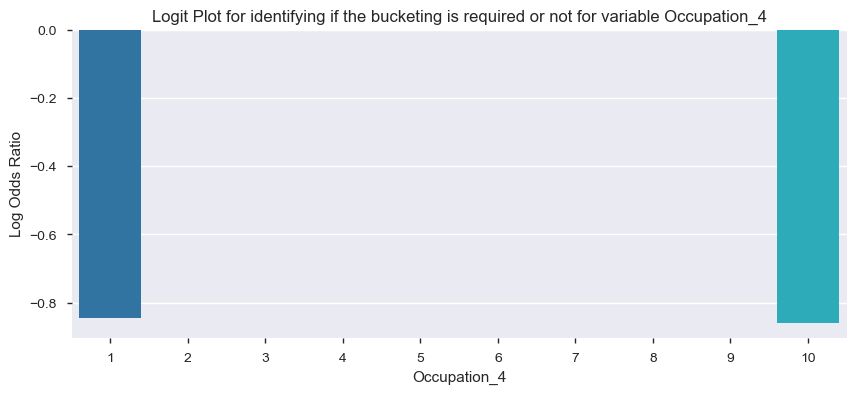

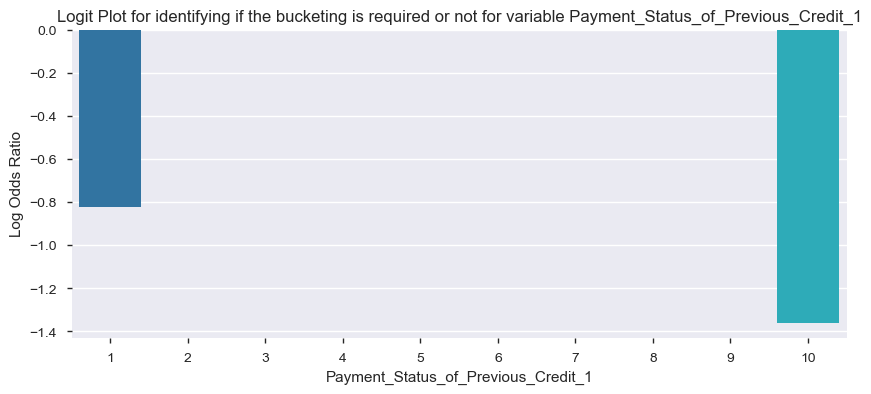

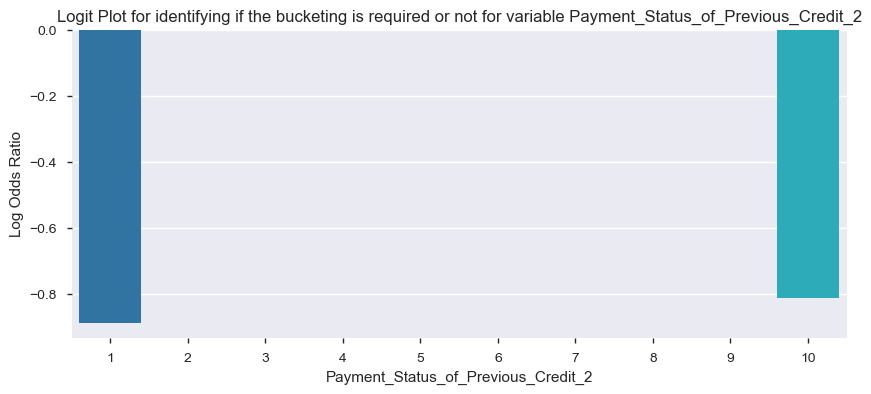

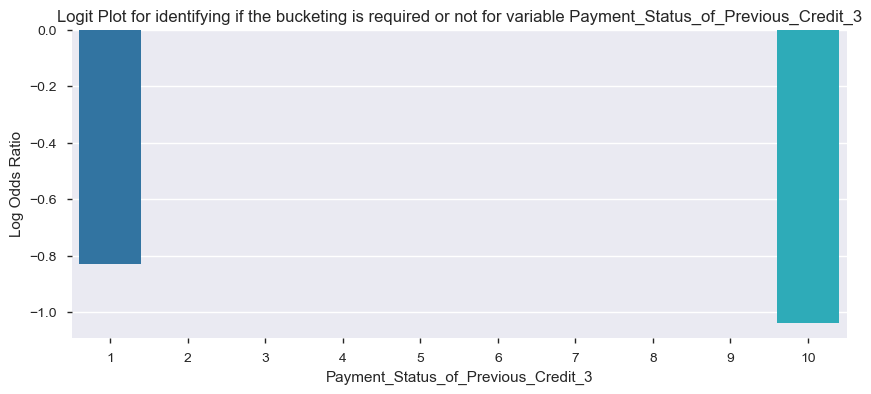

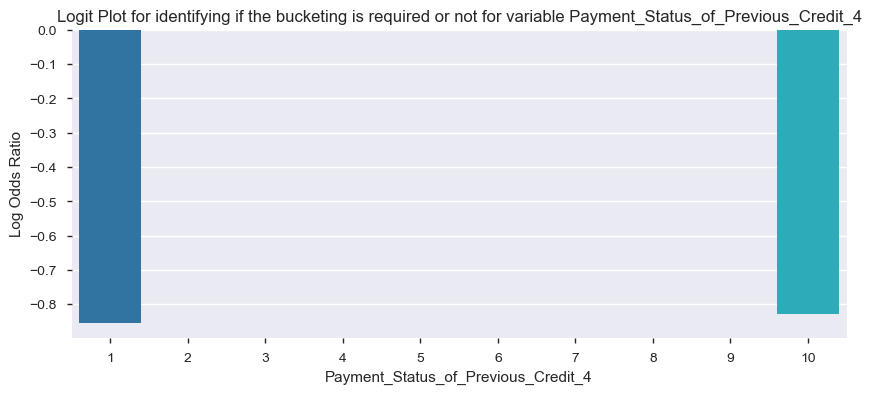

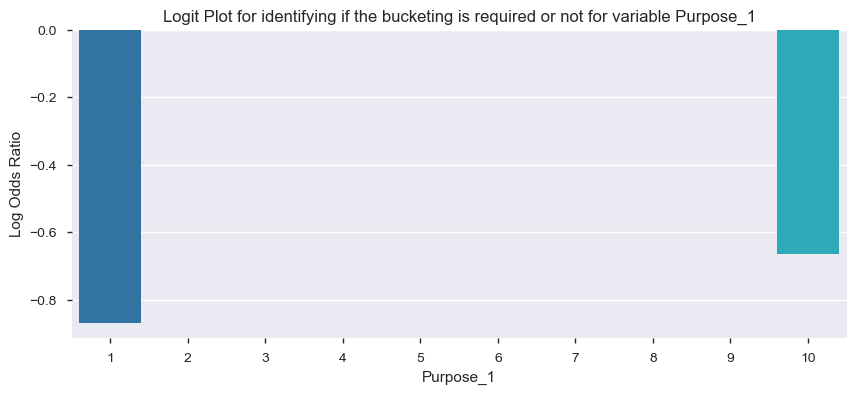

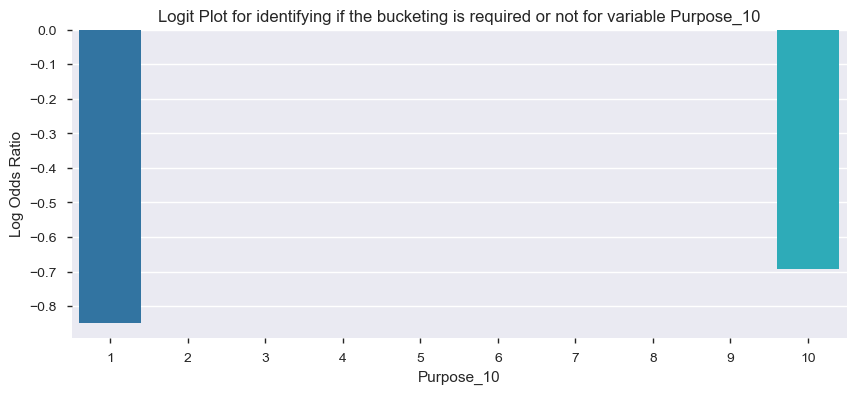

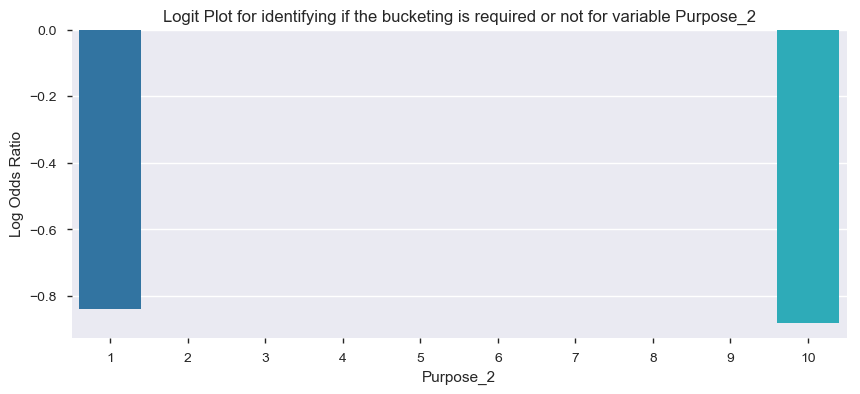

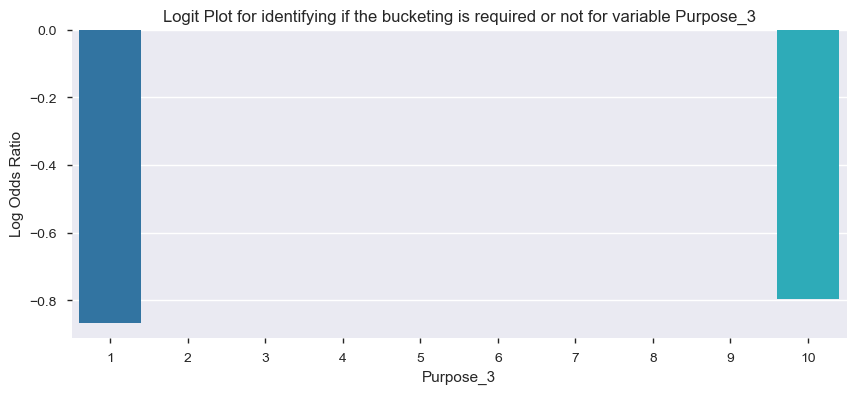

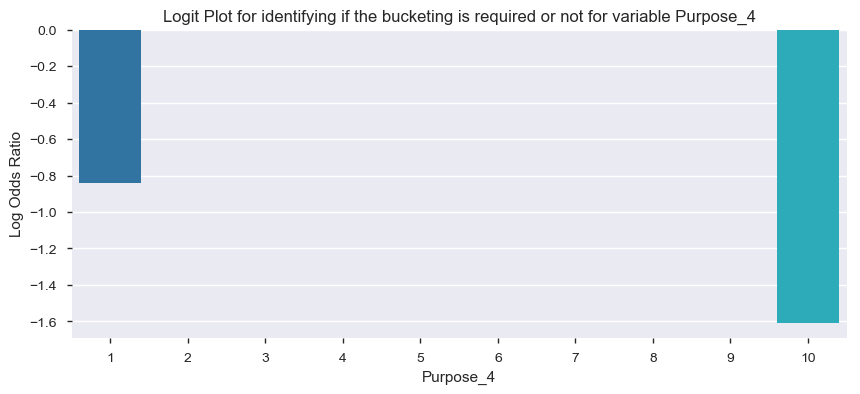

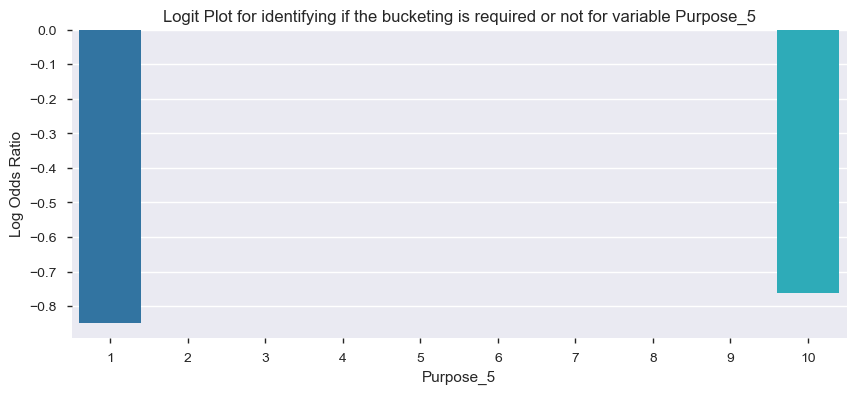

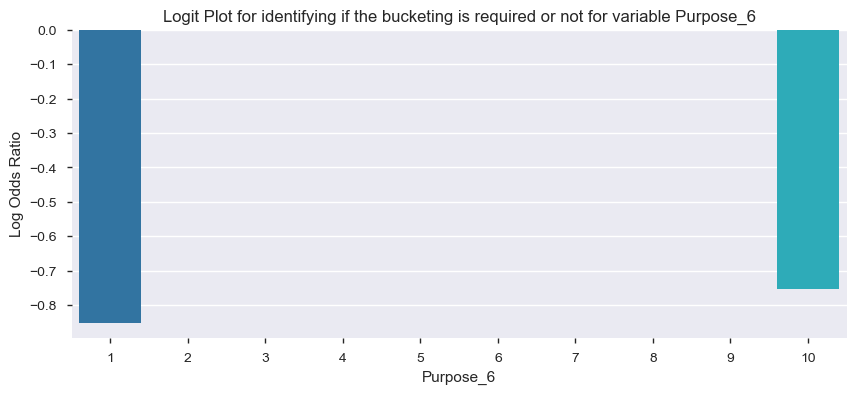

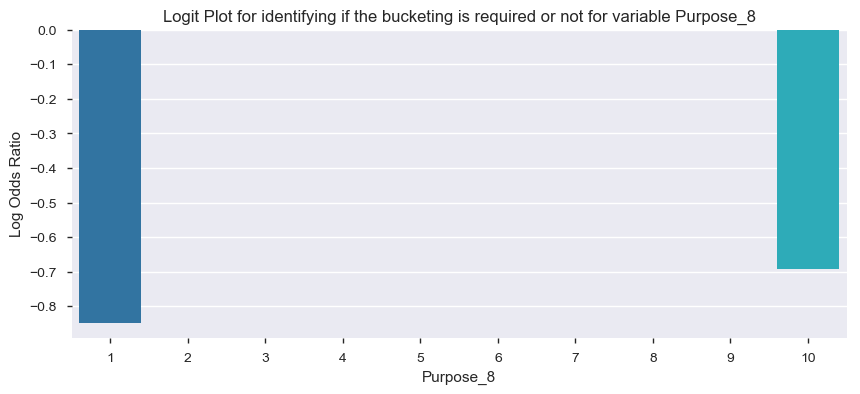

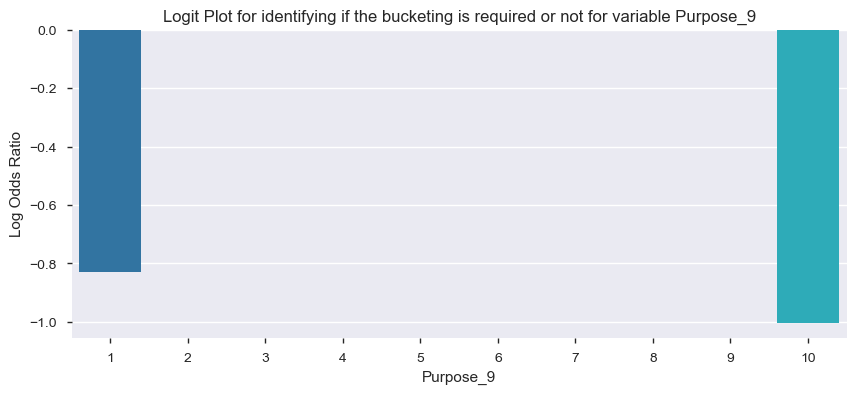

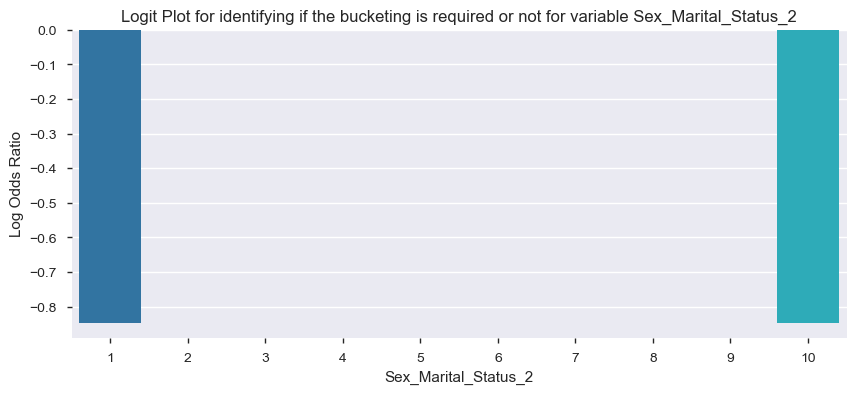

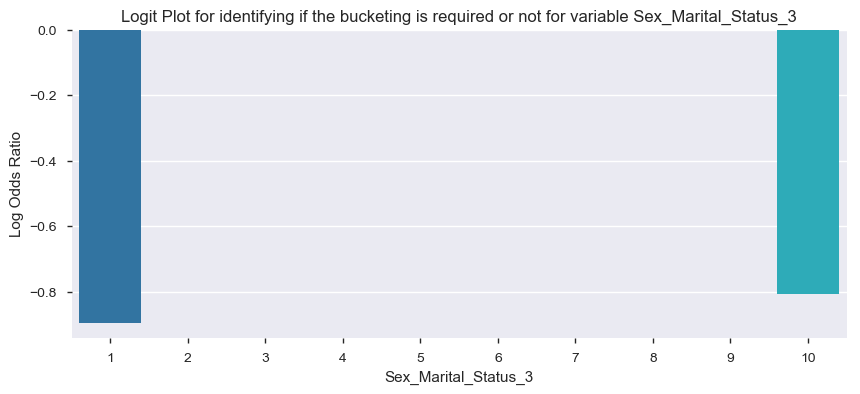

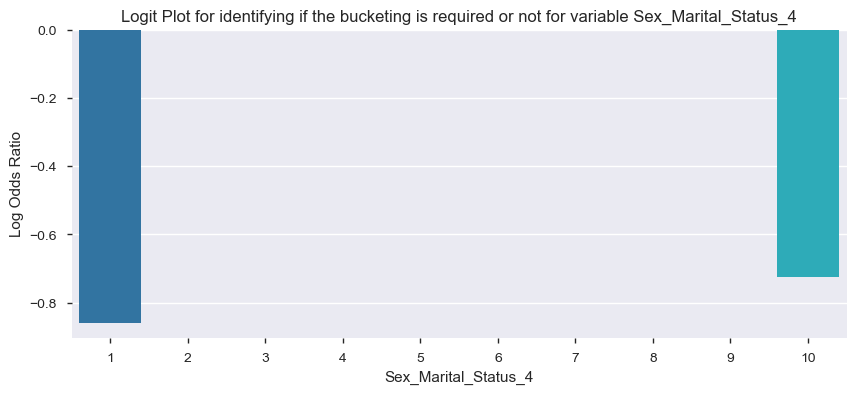

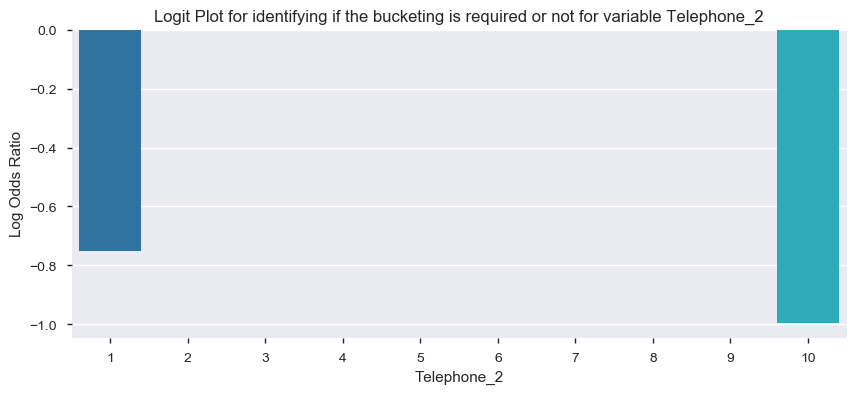

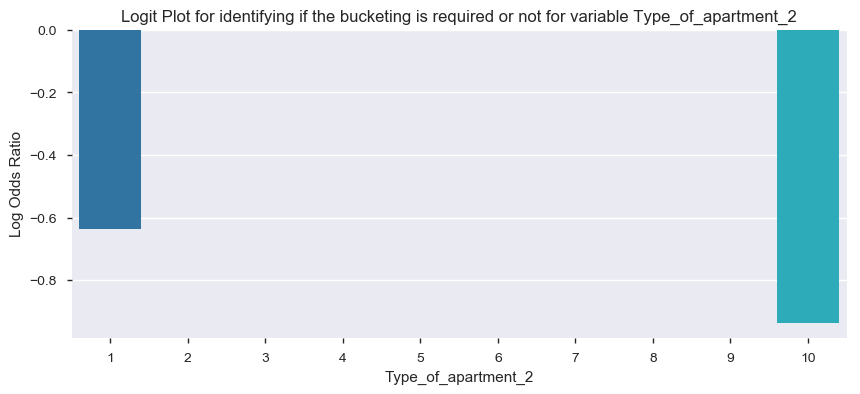

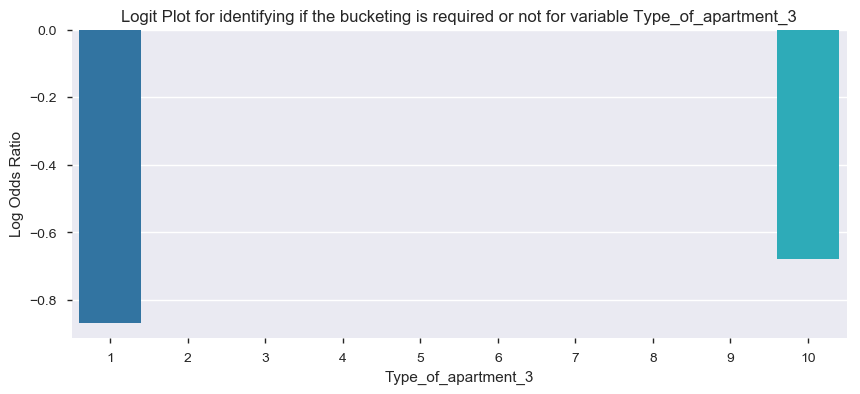

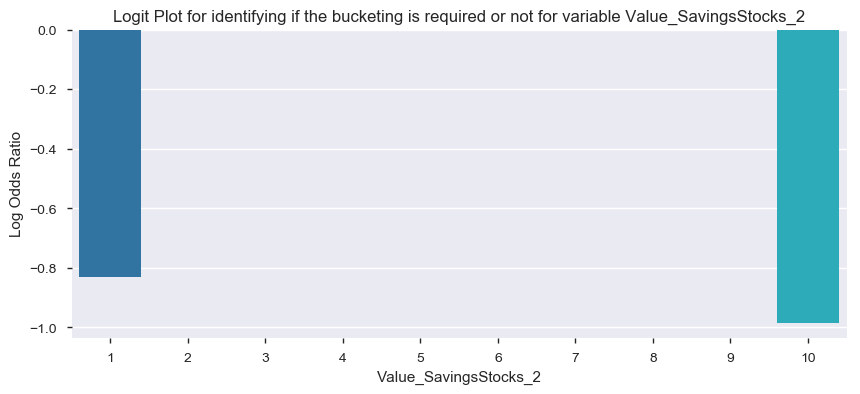

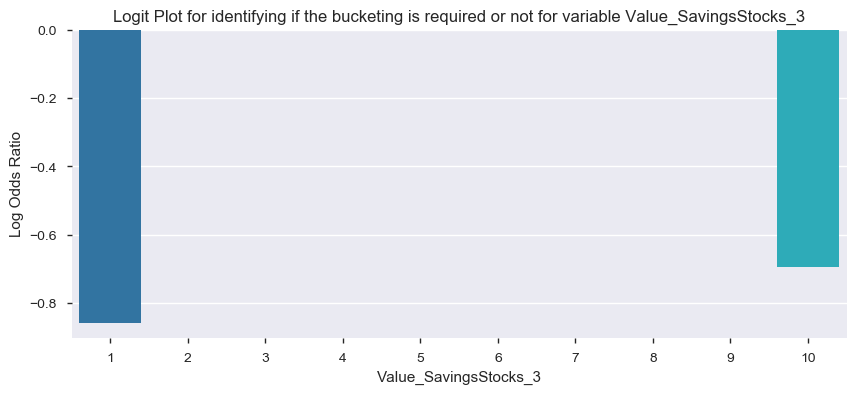

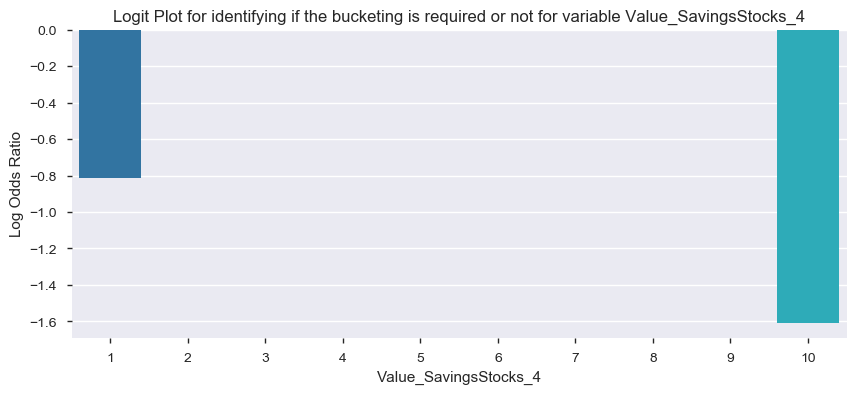

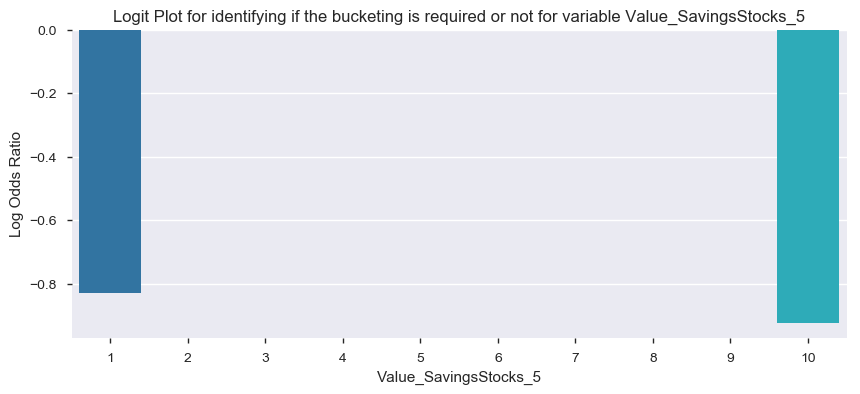

In [163]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in credit_new.columns.difference(['Bad_Flag']):
    binned = pd.cut(credit_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = credit_new.groupby(binned)['Bad_Flag'].sum() / (credit_new.groupby(binned)['Bad_Flag'].count()-credit_new.groupby(binned)['Bad_Flag'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [164]:
credit_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
Duration_of_Credit_month_              1000 non-null float64
Credit_Amount                          1000 non-null float64
Instalment_per_cent                    1000 non-null float64
Duration_in_Current_address            1000 non-null float64
Age_years_                             1000 non-null float64
No_of_Credits_at_this_Bank             1000 non-null float64
No_of_dependents                       1000 non-null float64
Bad_Flag                               1000 non-null float64
Account_Balance_2                      1000 non-null uint8
Account_Balance_3                      1000 non-null uint8
Account_Balance_4                      1000 non-null uint8
Concurrent_Credits_2                   1000 non-null uint8
Concurrent_Credits_3                   1000 non-null uint8
Foreign_Worker_2                       1000 non-null uint8
Guarantors_2                           1000 non-null

In [208]:
somersd_df61 = pd.DataFrame()
for num_variable in credit_new.columns.difference(['Bad_Flag']):
    logreg = sm.logit(formula = str('Bad_Flag ~ ')+str(num_variable), data=credit_new)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(credit_new['Bad_Flag'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df61 = pd.concat([somersd_df61, temp], axis=0)

somersd_df61

Optimization terminated successfully.
         Current function value: 0.609935
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610831
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610635
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607176
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610799
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609886
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610632
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610455
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609641
  

,Variable Name,SomersD
0,Account_Balance_2,0.0414286
0,Account_Balance_3,0.00428571
0,Account_Balance_4,0.0228571
0,Age_years_,0.111095
0,Concurrent_Credits_2,0.0052381
0,Concurrent_Credits_3,0.0371429
0,Credit_Amount,0.0197333
0,Duration_in_Current_address,0.041681
0,Duration_of_Credit_month_,0.049319
0,Foreign_Worker_2,0.0195238


In [209]:
somersd_df61.sort_values(by=['SomersD'],ascending=False).reset_index(drop=True)

,Variable Name,SomersD
0,Age_years_,0.111095
1,Type_of_apartment_2,0.0628571
2,No_of_Credits_at_this_Bank,0.0612
3,Telephone_2,0.0580952
4,Instalment_per_cent,0.0544
5,Duration_of_Credit_month_,0.049319
6,Length_of_current_employment_4,0.0485714
7,Duration_in_Current_address,0.041681
8,Account_Balance_2,0.0414286
9,Occupation_2,0.0380952


In [210]:
#roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]
somersd_df62=somersd_df61[somersd_df61['SomersD'] >= 0.0209]

In [212]:
somersd_df62.reset_index(drop=True)

,Variable Name,SomersD
0,Account_Balance_2,0.0414286
1,Account_Balance_4,0.0228571
2,Age_years_,0.111095
3,Concurrent_Credits_3,0.0371429
4,Duration_in_Current_address,0.041681
5,Duration_of_Credit_month_,0.049319
6,Guarantors_3,0.0257143
7,Instalment_per_cent,0.0544
8,Length_of_current_employment_3,0.0252381
9,Length_of_current_employment_4,0.0485714


In [222]:
somersd_df62.columns

Index(['Variable_Name', 'SomersD'], dtype='object')

In [221]:
l = []
somersd_df62.columns=[col.strip().replace(' ', '_') for col in somersd_df62.columns]

In [224]:
for i in somersd_df62.Variable_Name:
    l.append(i)
    

In [225]:
l

['Account_Balance_2',
 'Account_Balance_4',
 'Age_years_',
 'Concurrent_Credits_3',
 'Duration_in_Current_address',
 'Duration_of_Credit_month_',
 'Guarantors_3',
 'Instalment_per_cent',
 'Length_of_current_employment_3',
 'Length_of_current_employment_4',
 'Length_of_current_employment_5',
 'Most_valuable_available_asset_3',
 'Most_valuable_available_asset_4',
 'No_of_Credits_at_this_Bank',
 'Occupation_2',
 'Occupation_3',
 'Payment_Status_of_Previous_Credit_1',
 'Sex_Marital_Status_3',
 'Telephone_2',
 'Type_of_apartment_2',
 'Value_SavingsStocks_4']

In [227]:
credit_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
Duration_of_Credit_month_              1000 non-null float64
Credit_Amount                          1000 non-null float64
Instalment_per_cent                    1000 non-null float64
Duration_in_Current_address            1000 non-null float64
Age_years_                             1000 non-null float64
No_of_Credits_at_this_Bank             1000 non-null float64
No_of_dependents                       1000 non-null float64
Bad_Flag                               1000 non-null float64
Account_Balance_2                      1000 non-null uint8
Account_Balance_3                      1000 non-null uint8
Account_Balance_4                      1000 non-null uint8
Concurrent_Credits_2                   1000 non-null uint8
Concurrent_Credits_3                   1000 non-null uint8
Foreign_Worker_2                       1000 non-null uint8
Guarantors_2                           1000 non-null

In [229]:
credit_N1 = credit_new[l]

In [232]:
credit_N1['Bad_Flag'] = credit_new[['Bad_Flag']]

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [233]:
credit_N1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Account_Balance_2                      1000 non-null uint8
Account_Balance_4                      1000 non-null uint8
Age_years_                             1000 non-null float64
Concurrent_Credits_3                   1000 non-null uint8
Duration_in_Current_address            1000 non-null float64
Duration_of_Credit_month_              1000 non-null float64
Guarantors_3                           1000 non-null uint8
Instalment_per_cent                    1000 non-null float64
Length_of_current_employment_3         1000 non-null uint8
Length_of_current_employment_4         1000 non-null uint8
Length_of_current_employment_5         1000 non-null uint8
Most_valuable_available_asset_3        1000 non-null uint8
Most_valuable_available_asset_4        1000 non-null uint8
No_of_Credits_at_this_Bank             1000 non-null float64
Occupation_2                           1000 non-null uint8

In [235]:
## Variance Inflation Factor assessment
X = pd.concat([credit_N1[credit_N1.columns.difference(['Bad_Flag'])],credit_N1['Bad_Flag']], axis=1)
features = "+".join(credit_N1.columns.difference(['Bad_Flag']))
X.head()

,Account_Balance_2,Account_Balance_4,Age_years_,Concurrent_Credits_3,Duration_in_Current_address,Duration_of_Credit_month_,Guarantors_3,Instalment_per_cent,Length_of_current_employment_3,Length_of_current_employment_4,...,Most_valuable_available_asset_4,No_of_Credits_at_this_Bank,Occupation_2,Occupation_3,Payment_Status_of_Previous_Credit_1,Sex_Marital_Status_3,Telephone_2,Type_of_apartment_2,Value_SavingsStocks_4,Bad_Flag
0,0,0,21.0,1,4.0,18.0,0,4.0,0,0,...,0,1.0,0,1,0,0,0,0,0,0.0
1,0,0,36.0,1,2.0,9.0,0,2.0,1,0,...,0,2.0,0,1,0,1,0,0,0,1.0
2,1,0,23.0,1,4.0,12.0,0,2.0,0,1,...,0,1.0,1,0,0,0,0,0,0,0.0
3,0,0,39.0,1,2.0,12.0,0,3.0,1,0,...,0,2.0,1,0,0,1,0,0,0,0.0
4,0,0,38.0,0,4.0,12.0,0,4.0,1,0,...,0,2.0,1,0,0,1,0,1,0,1.0


In [238]:
features

'Account_Balance_2+Account_Balance_4+Age_years_+Concurrent_Credits_3+Duration_in_Current_address+Duration_of_Credit_month_+Guarantors_3+Instalment_per_cent+Length_of_current_employment_3+Length_of_current_employment_4+Length_of_current_employment_5+Most_valuable_available_asset_3+Most_valuable_available_asset_4+No_of_Credits_at_this_Bank+Occupation_2+Occupation_3+Payment_Status_of_Previous_Credit_1+Sex_Marital_Status_3+Telephone_2+Type_of_apartment_2+Value_SavingsStocks_4'

In [241]:
a,b = dmatrices(formula_like='Bad_Flag ~ '+ 'Account_Balance_2+Account_Balance_4+Age_years_+Concurrent_Credits_3+Duration_in_Current_address+Duration_of_Credit_month_+Guarantors_3+Instalment_per_cent+Length_of_current_employment_3+Length_of_current_employment_4+Most_valuable_available_asset_3+Most_valuable_available_asset_4+No_of_Credits_at_this_Bank+Occupation_3+Payment_Status_of_Previous_Credit_1+Sex_Marital_Status_3+Telephone_2+Type_of_apartment_2+Value_SavingsStocks_4', data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                             features
0    45.971943                            Intercept
1     1.360077                    Account_Balance_2
2     1.385998                    Account_Balance_4
3     1.284154                           Age_years_
4     1.170701                 Concurrent_Credits_3
5     1.222055          Duration_in_Current_address
6     1.151735            Duration_of_Credit_month_
7     1.068464                         Guarantors_3
8     1.038667                  Instalment_per_cent
9     1.218875       Length_of_current_employment_3
10    1.190079       Length_of_current_employment_4
11    1.210533      Most_valuable_available_asset_3
12    1.662576      Most_valuable_available_asset_4
13    1.068860           No_of_Credits_at_this_Bank
14    1.071785                         Occupation_3
15    1.165913  Payment_Status_of_Previous_Credit_1
16    1.141238                 Sex_Marital_Status_3
17    1.090488                          Telephone_2
18    1.4849

In [244]:
credit_N1=credit_N1.drop(columns=['Occupation_3','Length_of_current_employment_5'])

In [246]:
credit_N1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
Account_Balance_2                      1000 non-null uint8
Account_Balance_4                      1000 non-null uint8
Age_years_                             1000 non-null float64
Concurrent_Credits_3                   1000 non-null uint8
Duration_in_Current_address            1000 non-null float64
Duration_of_Credit_month_              1000 non-null float64
Guarantors_3                           1000 non-null uint8
Instalment_per_cent                    1000 non-null float64
Length_of_current_employment_3         1000 non-null uint8
Length_of_current_employment_4         1000 non-null uint8
Most_valuable_available_asset_3        1000 non-null uint8
Most_valuable_available_asset_4        1000 non-null uint8
No_of_Credits_at_this_Bank             1000 non-null float64
Occupation_2                           1000 non-null uint8
Payment_Status_of_Previous_Credit_1    1000 non-null uint8

In [248]:
credit_N1.head()

,Account_Balance_2,Account_Balance_4,Age_years_,Concurrent_Credits_3,Duration_in_Current_address,Duration_of_Credit_month_,Guarantors_3,Instalment_per_cent,Length_of_current_employment_3,Length_of_current_employment_4,Most_valuable_available_asset_3,Most_valuable_available_asset_4,No_of_Credits_at_this_Bank,Occupation_2,Payment_Status_of_Previous_Credit_1,Sex_Marital_Status_3,Telephone_2,Type_of_apartment_2,Value_SavingsStocks_4,Bad_Flag
0,0,0,21.0,1,4.0,18.0,0,4.0,0,0,0,0,1.0,0,0,0,0,0,0,0.0
1,0,0,36.0,1,2.0,9.0,0,2.0,1,0,0,0,2.0,0,0,1,0,0,0,1.0
2,1,0,23.0,1,4.0,12.0,0,2.0,0,1,0,0,1.0,1,0,0,0,0,0,0.0
3,0,0,39.0,1,2.0,12.0,0,3.0,1,0,0,0,2.0,1,0,1,0,0,0,0.0
4,0,0,38.0,0,4.0,12.0,0,4.0,1,0,0,0,2.0,1,0,1,0,1,0,1.0


In [250]:
#Train and Test split
train, test = train_test_split(credit_N1, test_size=0.3, random_state=42)
train.columns

Index(['Account_Balance_2', 'Account_Balance_4', 'Age_years_',
       'Concurrent_Credits_3', 'Duration_in_Current_address',
       'Duration_of_Credit_month_', 'Guarantors_3', 'Instalment_per_cent',
       'Length_of_current_employment_3', 'Length_of_current_employment_4',
       'Most_valuable_available_asset_3', 'Most_valuable_available_asset_4',
       'No_of_Credits_at_this_Bank', 'Occupation_2',
       'Payment_Status_of_Previous_Credit_1', 'Sex_Marital_Status_3',
       'Telephone_2', 'Type_of_apartment_2', 'Value_SavingsStocks_4',
       'Bad_Flag'],
      dtype='object')

### Building Regression Model

In [253]:
logreg = sm.logit(formula='Bad_Flag ~ Account_Balance_2+Account_Balance_4+Age_years_+Concurrent_Credits_3+Duration_in_Current_address+Duration_of_Credit_month_+Guarantors_3+Instalment_per_cent+Length_of_current_employment_3+Length_of_current_employment_4+Most_valuable_available_asset_3+Most_valuable_available_asset_4+No_of_Credits_at_this_Bank+Occupation_2+Payment_Status_of_Previous_Credit_1+Sex_Marital_Status_3+Telephone_2+Type_of_apartment_2+Value_SavingsStocks_4', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.581829
         Iterations 6


In [254]:
 print(result.summary2())

                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.046    
Dependent Variable:        Bad_Flag               AIC:                    854.5609 
Date:                      2018-11-25 23:49       BIC:                    945.5825 
No. Observations:          700                    Log-Likelihood:         -407.28  
Df Model:                  19                     LL-Null:                -426.75  
Df Residuals:              680                    LLR p-value:            0.0044863
Converged:                 1.0000                 Scale:                  1.0000   
No. Iterations:            6.0000                                                  
-----------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                  

In [255]:
credit_N1=credit_N1.drop(columns=['Concurrent_Credits_3','Duration_in_Current_address','Duration_of_Credit_month_','Account_Balance_4','Most_valuable_available_asset_4','Occupation_2','Sex_Marital_Status_3','Type_of_apartment_2'])

In [256]:
credit_N1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Account_Balance_2                      1000 non-null uint8
Age_years_                             1000 non-null float64
Guarantors_3                           1000 non-null uint8
Instalment_per_cent                    1000 non-null float64
Length_of_current_employment_3         1000 non-null uint8
Length_of_current_employment_4         1000 non-null uint8
Most_valuable_available_asset_3        1000 non-null uint8
No_of_Credits_at_this_Bank             1000 non-null float64
Payment_Status_of_Previous_Credit_1    1000 non-null uint8
Telephone_2                            1000 non-null uint8
Value_SavingsStocks_4                  1000 non-null uint8
Bad_Flag                               1000 non-null float64
dtypes: float64(4), uint8(8)
memory usage: 39.1 KB


In [257]:
#Train and Test split
train, test = train_test_split(credit_N1, test_size=0.3, random_state=42)
train.columns

Index(['Account_Balance_2', 'Age_years_', 'Guarantors_3',
       'Instalment_per_cent', 'Length_of_current_employment_3',
       'Length_of_current_employment_4', 'Most_valuable_available_asset_3',
       'No_of_Credits_at_this_Bank', 'Payment_Status_of_Previous_Credit_1',
       'Telephone_2', 'Value_SavingsStocks_4', 'Bad_Flag'],
      dtype='object')

In [259]:
logreg = sm.logit(formula='Bad_Flag ~ Account_Balance_2+Age_years_+Guarantors_3+Instalment_per_cent+Length_of_current_employment_3+Length_of_current_employment_4+Most_valuable_available_asset_3+No_of_Credits_at_this_Bank+Payment_Status_of_Previous_Credit_1+Telephone_2+Value_SavingsStocks_4', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.587304
         Iterations 6


In [260]:
 print(result.summary2())

                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.037     
Dependent Variable:       Bad_Flag               AIC:                    846.2261  
Date:                     2018-11-26 00:07       BIC:                    900.8390  
No. Observations:         700                    Log-Likelihood:         -411.11   
Df Model:                 11                     LL-Null:                -426.75   
Df Residuals:             688                    LLR p-value:            0.00099327
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           6.0000                                                   
-----------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                  

In [262]:
train_gini = 2*metrics.roc_auc_score(train['Bad_Flag'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['Bad_Flag'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.258987127140198
The Gini Index for the model built on the Test Data is :  0.0904884589095114


In [263]:
train_auc = metrics.roc_auc_score(train['Bad_Flag'], result.predict(train))
test_auc = metrics.roc_auc_score(test['Bad_Flag'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The AUC for the model built on the Train Data is :  0.629493563570099
The AUC for the model built on the Test Data is :  0.5452442294547557


In [264]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['Bad_Flag']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
541,0.0,0.186059
440,0.0,0.411181
482,0.0,0.257982
422,0.0,0.185992
778,0.0,0.261156


In [266]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['Bad_Flag']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
521,1.0,0.492179
737,0.0,0.187492
740,0.0,0.253405
660,0.0,0.306406
411,0.0,0.364274


In [267]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [268]:
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 0.0 if x < 0.2 else 1.0)

In [269]:
train_predict.head()

,actual,prob,predicted
541,0.0,0.186059,0.0
440,0.0,0.411181,1.0
482,0.0,0.257982,1.0
422,0.0,0.185992,0.0
778,0.0,0.261156,1.0


In [270]:
train_predict['tp'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['fp'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['tn'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
train_predict['fn'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)

In [271]:
train_predict.head(20)

,actual,prob,predicted,tp,fp,tn,fn
541,0.0,0.186059,0.0,0.0,0.0,1.0,0.0
440,0.0,0.411181,1.0,0.0,1.0,0.0,0.0
482,0.0,0.257982,1.0,0.0,1.0,0.0,0.0
422,0.0,0.185992,0.0,0.0,0.0,1.0,0.0
778,0.0,0.261156,1.0,0.0,1.0,0.0,0.0
949,1.0,0.404277,1.0,1.0,0.0,0.0,0.0
334,1.0,0.343612,1.0,1.0,0.0,0.0,0.0
576,0.0,0.388216,1.0,0.0,1.0,0.0,0.0
934,0.0,0.325065,1.0,0.0,1.0,0.0,0.0
567,0.0,0.337470,1.0,0.0,1.0,0.0,0.0


In [273]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [274]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.298571
0,0.020408,1.000000,0.000000,0.298571
0,0.040816,1.000000,0.000000,0.298571
0,0.061224,0.995215,0.004073,0.300000
0,0.081633,0.995215,0.014257,0.307143


In [275]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity'] 

In [276]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.298571,1.000000
0,0.020408,1.000000,0.000000,0.298571,1.000000
0,0.040816,1.000000,0.000000,0.298571,1.000000
0,0.061224,0.995215,0.004073,0.300000,0.999289
0,0.081633,0.995215,0.014257,0.307143,1.009472


In [277]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.306122,0.631579,0.594705,0.605714,1.226284


In [278]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.489796,0.033493,0.995927,0.708571,1.02942


In [279]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.0,0.0,0.298571,1.0
0,0.020408,1.0,0.0,0.298571,1.0
0,0.040816,1.0,0.0,0.298571,1.0


In [280]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.24 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.24 else 0)

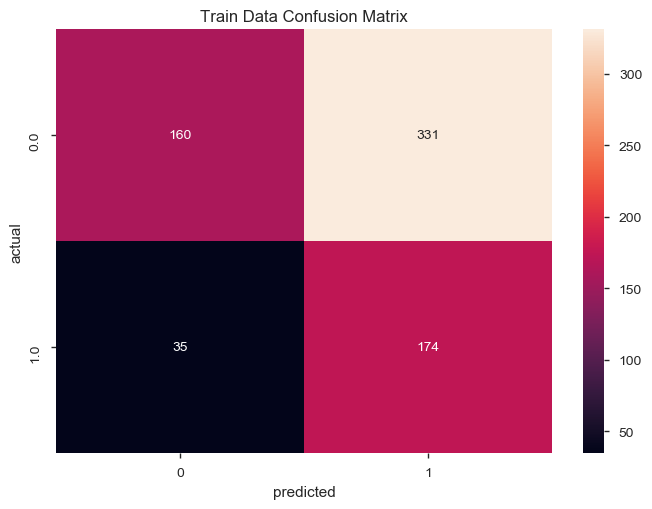

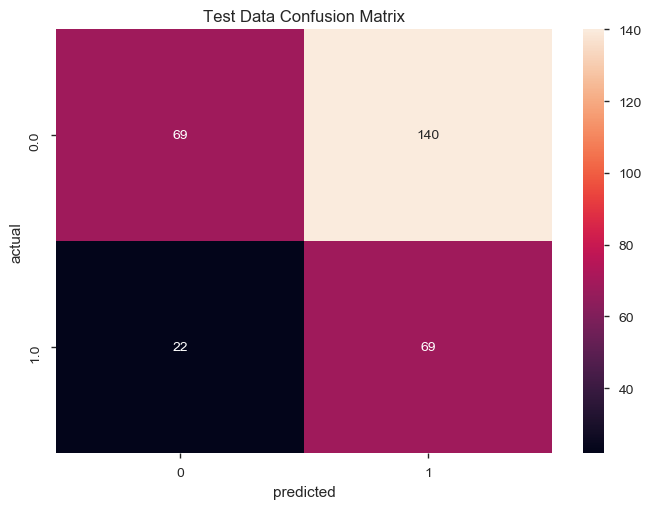

In [281]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()


In [282]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.47714285714285715
The overall accuracy score for the Test Data  is :  0.46


In [283]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

             precision    recall  f1-score   support

        0.0       0.82      0.33      0.47       491
        1.0       0.34      0.83      0.49       209

avg / total       0.68      0.48      0.47       700



In [284]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

             precision    recall  f1-score   support

        0.0       0.76      0.33      0.46       209
        1.0       0.33      0.76      0.46        91

avg / total       0.63      0.46      0.46       300



In [285]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

             precision    recall  f1-score   support

        0.0       0.76      0.33      0.46       209
        1.0       0.33      0.76      0.46        91

avg / total       0.63      0.46      0.46       300



In [286]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

In [287]:
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn,Deciles
541,0.0,0.186059,0,0.0,0.0,1.0,0.0,1
440,0.0,0.411181,1,0.0,1.0,0.0,0.0,8
482,0.0,0.257982,1,0.0,1.0,0.0,0.0,3
422,0.0,0.185992,0,0.0,0.0,1.0,0.0,1
778,0.0,0.261156,1,0.0,1.0,0.0,0.0,3


In [288]:
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']

In [289]:
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']

In [290]:
no_1s.sort_values(ascending=False)

Deciles
6    30.0
7    30.0
9    27.0
5    25.0
8    25.0
4    19.0
1    16.0
2    16.0
3    15.0
0     6.0
Name: actual, dtype: float64

In [291]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

In [292]:
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn,Deciles
541,0.0,0.186059,0,0.0,0.0,1.0,0.0,1
440,0.0,0.411181,1,0.0,1.0,0.0,0.0,8
482,0.0,0.257982,1,0.0,1.0,0.0,0.0,3
422,0.0,0.185992,0,0.0,0.0,1.0,0.0,1
778,0.0,0.261156,1,0.0,1.0,0.0,0.0,3


In [293]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

,actual,prob,predicted,Deciles
521,1.0,0.492179,1,9
737,0.0,0.187492,0,1
740,0.0,0.253405,1,3
660,0.0,0.306406,1,5
411,0.0,0.364274,1,7


In [294]:
# Decile Analysis for train data

In [297]:
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [298]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [299]:
Decile_analysis_train

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.545401,0.424127,27.0,43.0,70
8,0.422637,0.383298,25.0,45.0,70
7,0.381960,0.354631,30.0,39.0,69
6,0.354122,0.324391,30.0,41.0,71
5,0.323483,0.299894,25.0,45.0,70
4,0.299508,0.273961,19.0,51.0,70
3,0.273864,0.244648,15.0,54.0,69
2,0.244451,0.214610,16.0,55.0,71
1,0.214423,0.175840,16.0,54.0,70


In [300]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.496288,0.420720,14.0,16.0,30
8,0.420290,0.391046,7.0,23.0,30
7,0.390040,0.359147,6.0,24.0,30
6,0.357769,0.330680,10.0,20.0,30
5,0.328184,0.304406,15.0,15.0,30
4,0.304270,0.278238,5.0,25.0,30
3,0.277811,0.237122,12.0,18.0,30
2,0.236240,0.195555,5.0,25.0,30
1,0.195507,0.141508,11.0,19.0,30


In [302]:
Decile_analysis_train.to_csv('Decile_credit_analysis_train.csv')

In [303]:
Decile_analysis_test.to_csv('Decile_creditanalysis_test.csv')

In [304]:
import os

In [305]:
os.getcwd()

'C:\\Users\\Harsh\\Downloads\\Techm DSA\\Week2 Assessment _ Harsh\\Week 2 Assessment Stats & Linear Regression'

In [311]:
#df.rename(columns = {'$b':'B'}, inplace = True)
credit_N1=credit_N1.rename(columns={'Age_years_':'Age_years'})

In [316]:
credit_N1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Account_Balance_2                      1000 non-null float64
Age_years                              1000 non-null float64
Guarantors_3                           1000 non-null float64
Instalment_per_cent                    1000 non-null float64
Length_of_current_employment_3         1000 non-null float64
Length_of_current_employment_4         1000 non-null float64
Most_valuable_available_asset_3        1000 non-null float64
No_of_Credits_at_this_Bank             1000 non-null float64
Payment_Status_of_Previous_Credit_1    1000 non-null float64
Telephone_2                            1000 non-null float64
Value_SavingsStocks_4                  1000 non-null float64
Bad_Flag                               1000 non-null float64
dtypes: float64(12)
memory usage: 93.8 KB


In [314]:
for c_feature in credit_N1.columns:
    credit_N1[c_feature] = credit_N1[c_feature].astype(float)

In [319]:
credit_N1['exp_val'] = - 0.4954  - (0.5204 * credit_N1['Account_Balance_2']) - (0.022 * credit_N1['Age_years']) - (0.3538 * credit_N1['Guarantors_3']) + (0.1427 * credit_N1['Instalment_per_cent']) - (0.2627 * credit_N1['Length_of_current_employment_3']) - (0.5942 * credit_N1['Length_of_current_employment_4']) + (0.1308 * credit_N1['Most_valuable_available_asset_3']) + (0.2629 * credit_N1['No_of_Credits_at_this_Bank']) - (0.9372 * credit_N1['Payment_Status_of_Previous_Credit_1']) - (0.1914 * credit_N1['Telephone_2']) - (0.7929 * credit_N1['Value_SavingsStocks_4']) 



In [323]:
credit_N1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
Account_Balance_2                      1000 non-null float64
Age_years                              1000 non-null float64
Guarantors_3                           1000 non-null float64
Instalment_per_cent                    1000 non-null float64
Length_of_current_employment_3         1000 non-null float64
Length_of_current_employment_4         1000 non-null float64
Most_valuable_available_asset_3        1000 non-null float64
No_of_Credits_at_this_Bank             1000 non-null float64
Payment_Status_of_Previous_Credit_1    1000 non-null float64
Telephone_2                            1000 non-null float64
Value_SavingsStocks_4                  1000 non-null float64
Bad_Flag                               1000 non-null float64
exp_val                                1000 non-null float64
dtypes: float64(13)
memory usage: 101.6 KB


In [321]:
import math


In [327]:
math.exp(2)

7.38905609893065

In [331]:
for i in credit_N1.exp_val:
 #   credit_N1['eval'] = math.exp(i)/(1 + math.exp(i))
     print(i)

-0.12370000000000003
-0.7388999999999997
-1.5676999999999999
-0.6621999999999999
-0.49749999999999983
-0.8829
-1.2791
-0.8270999999999998
-0.698
-1.1162
-0.7388999999999997
-0.8182999999999998
-1.2351999999999999
-1.3408999999999998
-0.6536
-1.1778
-0.9695999999999998
-1.1601999999999997
-0.9740999999999999
-0.9475999999999998
-0.6406999999999997
-1.4252999999999998
-0.9081
-1.3483
-0.7948999999999999
-2.1836999999999995
-0.1897000000000001
-0.7556999999999999
-0.7051
-0.8937
-0.6957000000000001
-0.8675999999999997
-0.2074
-0.7410999999999998
-0.7390999999999998
-0.8762999999999999
-0.2347999999999999
-0.2561999999999999
-1.0832
-0.36139999999999994
-0.4989999999999999
-1.4829
-0.4534999999999998
-1.4527999999999999
-1.7868
-0.22830000000000003
-0.9973
-0.3214999999999999
-0.5791000000000001
-0.7563999999999997
-1.0023999999999997
-0.9072000000000001
-0.46419999999999995
-1.3591999999999997
-0.767
-1.1975
-1.2616
-0.2556999999999999
-0.7551
-0.7163999999999998
-1.0837999999999999
-0.49

0.1612
-0.7111999999999998
-2.5154999999999994
-1.2259
-1.2171
-0.698
-0.19079999999999986
-0.30079999999999996
-1.1355999999999997
-0.12469999999999981
-1.5472999999999997
-1.8563
-0.7760999999999999
-1.1273999999999997
-1.2821000000000002
-0.6023
-0.4201999999999999
-1.1412
-0.6729999999999999
-1.3955
-1.2351999999999999
-0.5802999999999999
-0.6449999999999999
-1.3241999999999998
-2.9487999999999994
-0.8638
-1.0318
-0.46499999999999997
-0.8710999999999999
-1.7165
-0.6024
-1.4664000000000001
-0.6243999999999998
-0.8045
-1.0806
-2.6761999999999997
-0.519
-1.0820999999999998
-1.0693000000000001
-0.8144999999999999
-1.1654999999999998
-0.5095000000000001
-2.1788
-0.9264
-0.8421
-0.40959999999999985
-1.4161000000000001
-0.8100000000000002
-1.3076
0.006000000000000005
-0.5879999999999999
-0.5867
-1.3266
-0.38239999999999985
-1.1294000000000002
-1.0915
-0.9189999999999998
-1.3687999999999998
-0.30200000000000005
-0.6091000000000001
-1.7025999999999997
-0.5082
-2.6369
-0.3216
-0.190899999999

In [330]:
credit_N1

,Account_Balance_2,Age_years,Guarantors_3,Instalment_per_cent,Length_of_current_employment_3,Length_of_current_employment_4,Most_valuable_available_asset_3,No_of_Credits_at_this_Bank,Payment_Status_of_Previous_Credit_1,Telephone_2,Value_SavingsStocks_4,Bad_Flag,exp_val,eval
0,0.0,21.00,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.12370,0.414911
1,0.0,36.00,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,-0.73890,0.414911
2,1.0,23.00,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.56770,0.414911
3,0.0,39.00,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-0.66220,0.414911
4,0.0,38.00,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,-0.49750,0.414911
5,0.0,48.00,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-0.88290,0.414911
6,0.0,39.00,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.27910,0.414911
7,0.0,40.00,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.82710,0.414911
8,0.0,65.00,0.0,4.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,-0.69800,0.414911
9,1.0,23.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.11620,0.414911


C:\Users\Harsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


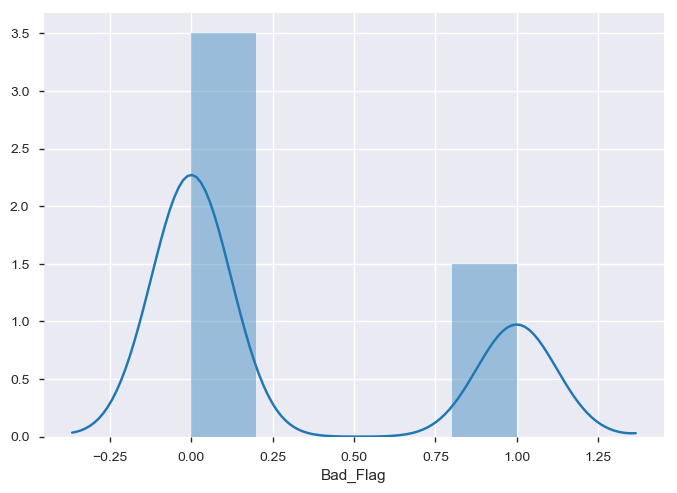

In [332]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(credit_N1.Bad_Flag)

In [333]:
credit_N1["ln_Bflag"]= np.log(credit_N1["Bad_Flag"])

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [339]:
credit_N1 = credit_N1.drop(columns=['ln_Bflag'])

In [341]:
credit_N1.columns

Index(['Account_Balance_2', 'Age_years', 'Guarantors_3', 'Instalment_per_cent',
       'Length_of_current_employment_3', 'Length_of_current_employment_4',
       'Most_valuable_available_asset_3', 'No_of_Credits_at_this_Bank',
       'Payment_Status_of_Previous_Credit_1', 'Telephone_2',
       'Value_SavingsStocks_4', 'Bad_Flag', 'exp_val', 'eval'],
      dtype='object')

In [347]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_N1[['Account_Balance_2', 'Age_years', 'Guarantors_3', 'Bad_Flag','Length_of_current_employment_3', 'Length_of_current_employment_4','Most_valuable_available_asset_3', 'No_of_Credits_at_this_Bank','Payment_Status_of_Previous_Credit_1', 'Telephone_2','Value_SavingsStocks_4', 'Bad_Flag']],
                                                  credit_N1['Instalment_per_cent'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [348]:
print(len( train_X ))
print(len( test_X))

700
300


In [349]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split( credit_N1,test_size = 0.3,random_state = 1234 )

In [350]:
### Building a linear regression model
import statsmodels.formula.api as smf

In [351]:
lm=smf.ols('Instalment_per_cent~Account_Balance_2+Age_years+Guarantors_3+Bad_Flag+Length_of_current_employment_3+Length_of_current_employment_4+Most_valuable_available_asset_3+No_of_Credits_at_this_Bank+Payment_Status_of_Previous_Credit_1+Telephone_2+Value_SavingsStocks_4', train).fit()

In [352]:
test['pred_sales'] = (lm.predict(test))

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [353]:
test.head()

,Account_Balance_2,Age_years,Guarantors_3,Instalment_per_cent,Length_of_current_employment_3,Length_of_current_employment_4,Most_valuable_available_asset_3,No_of_Credits_at_this_Bank,Payment_Status_of_Previous_Credit_1,Telephone_2,Value_SavingsStocks_4,Bad_Flag,exp_val,eval,pred_sales
681,1.0,40.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.2957,0.414911,2.844398
990,0.0,27.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.2557,0.414911,2.872153
155,0.0,35.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,-0.4315,0.414911,2.830531
768,1.0,29.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-2.6369,0.414911,3.056748
438,0.0,43.0,0.0,4.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,-0.1425,0.414911,3.087443


In [354]:
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Instalment_per_cent   R-squared:                       0.026
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     1.650
Date:                 Mon, 26 Nov 2018   Prob (F-statistic):             0.0809
Time:                         03:52:50   Log-Likelihood:                -1063.3
No. Observations:                  700   AIC:                             2151.
Df Residuals:                      688   BIC:                             2205.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [355]:
train['pred_sales'] = (lm.predict(train))

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [356]:
train.head()

,Account_Balance_2,Age_years,Guarantors_3,Instalment_per_cent,Length_of_current_employment_3,Length_of_current_employment_4,Most_valuable_available_asset_3,No_of_Credits_at_this_Bank,Payment_Status_of_Previous_Credit_1,Telephone_2,Value_SavingsStocks_4,Bad_Flag,exp_val,eval,pred_sales
96,1.0,23.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.3789,0.414911,2.536352
792,0.0,55.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-2.2857,0.414911,3.426610
218,0.0,35.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0512,0.414911,2.982348
967,0.0,26.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.4964,0.414911,2.684187
170,0.0,24.0,0.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.3216,0.414911,2.957930


In [358]:
# accuracy metrics
Mape_train=np.mean(np.abs(train['Instalment_per_cent'] - train['pred_sales'])/train['Instalment_per_cent'])
#Mape_test=np.mean(np.abs(test['Price'] - test['pred_sales'])/test['Price'])
print(Mape_train)
#print(Mape_test)

0.4995846229136303


In [359]:
test['pred_int'] = (lm.predict(test))

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [360]:
Mape_test=np.mean(np.abs(test['Instalment_per_cent'] - test['pred_int'])/test['Instalment_per_cent'])
print(Mape_test)

0.49374052115343225


In [361]:
corr_train =np.corrcoef(train['Instalment_per_cent'],train['pred_sales'])[1][0]

In [362]:
corr_test =np.corrcoef(test['Instalment_per_cent'],test['pred_int'])[1][0]

In [363]:
print(corr_test);print(corr_train)

0.019235331751497598
0.16032087237333129
